<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/eunsun/chap09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [68]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


In [69]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]

In [70]:
model = keras.models.Sequential( [
   
    keras.layers.Conv2D(input_shape=(28, 28,1), 
                        kernel_size = (3,3), padding ='same', 
                        filters = 128),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding ='same', 
                        filters = 64),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [71]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 187s 133ms/step - loss: 0.1554 - accuracy: 0.9422 - val_loss: 0.3195 - val_accuracy: 0.9067
Epoch 2/5
1407/1407 [==============================] - 185s 132ms/step - loss: 0.1323 - accuracy: 0.9517 - val_loss: 0.3820 - val_accuracy: 0.9016
Epoch 3/5
1407/1407 [==============================] - 185s 131ms/step - loss: 0.1185 - accuracy: 0.9558 - val_loss: 0.3808 - val_accuracy: 0.9045
Epoch 4/5
1407/1407 [==============================] - 185s 132ms/step - loss: 0.1108 - accuracy: 0.9598 - val_loss: 0.4030 - val_accuracy: 0.9010
Epoch 5/5
1407/1407 [==============================] - 187s 133ms/step - loss: 0.0968 - accuracy: 0.9646 - val_loss: 0.4398 - val_accuracy: 0.9067


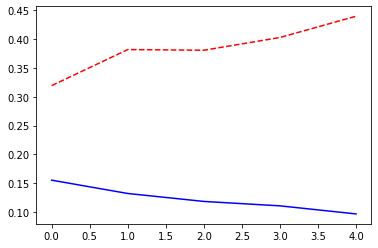

In [76]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

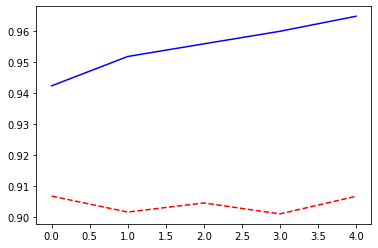

In [77]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')

In [78]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)
print('테스트 손실값: ', test_loss)

313/313 - 8s - loss: 0.4840 - accuracy: 0.8982
테스트 정확도: 0.8981999754905701
테스트 손실값:  0.48401880264282227


### **9.1 합성곱 신경망을 사용하는 것이 완전 연결 심층 신경망을 사용하는 것보다 좋은 점을 2가지 이상 서술하라**

 

*   CNN은 많은 가중치를 재사용하여 DNN보다 적은 파라미터를 가진다. 그리하여 속도가빠르다.
*   CNN은 과대적합의 위험을 줄이며 더 적은 훈련 데이터를 필요로 한다.
*   CNN은 어떤 특성을 감지할 수 있는 커널을 학습하면 이미지의 어느 위치에 있는 특성이라도 감지할 수 있지만, DNN은 특정 위치에 있어야 인지할 수 있다.
*   DNN은 픽셀이 어떻게 조직되어있는지 모른다. 즉 주변의 픽셀이 비슷한지 알 수 없다 그러나 CNN은 이 정보를 내포한다
하위층은 작은 영역에 있는 특성을 구별하고, 상위층은 저수준 특성을 더 큰 특성으로 연결한다.





